In [9]:
# Import dataset - Can use 10% of entire dataset or subset = 'http'
from sklearn.datasets import fetch_kddcup99
kdd99_data = fetch_kddcup99(subset='http')
import numpy as np
X_og = kdd99_data['data']
y_og = kdd99_data['target']

In [ ]:
# When running 10% of entire dataset - Remove categorical data
X_num_sample = np.delete(X_og,[1,2,3],1)
print(X_num_sample.shape)
print(y_og.shape)

In [ ]:
# Make sure all categorical columns were removed
X_num_sample[0:1]

In [ ]:
# When running 10% of entire dataset - Take a sample from the dataset 
sample_indices = np.random.choice(range(len(y_og)), 59000)
X_sample = X_num_sample[sample_indices,:]
y = y_og[sample_indices]
print(X_sample.shape)
print(y.shape)

In [10]:
# http subset - Take a sample from the dataset
sample_indices = np.random.choice(range(len(y_og)), 59000)
X_sample = X_og[sample_indices,:]
y = y_og[sample_indices]
print(X_sample.shape)
print(y.shape)

(59000, 3)
(59000,)


In [11]:
# Assign each attack type to a numerical representation of an attack category

for i in range(X_sample.shape[0]):
  
    if(y[i]==b'normal.'):
        y[i] = 0
    
# dos
    if(y[i]==b'neptune.'or y[i]==b'smurf.'or y[i]==b'pod.' or y[i]==b'teardrop.' or y[i]==b'land.' or y[i]==b'back.'):
        y[i] = 1

# u2r
    if(y[i]==b'buffer_overflow.' or y[i]==b'loadmodule.' or y[i]==b'perl.' or y[i]==b'rootkit.'):
        y[i] = 2
    
# r2l 
    if(y[i]==b'guess_passwd.' or y[i]==b'ftp_write.' or y[i]==b'imap.' or y[i]==b'phf.' or y[i]==b'multihop.' or y[i]==b'warezmaster.' or y[i]==b'warezclient.' or y[i]==b'spy.'):
        y[i] = 3

# probe
    if(y[i]==b'portsweep.' or y[i]==b'ipsweep.' or y[i]==b'nmap.' or y[i]==b'satan.'):
        y[i] = 4

In [12]:
# y is now an array of integers
y = np.int64(y)
y[0:100]
print(set(y))

{0, 1, 3, 4}


In [13]:
# Split data into testing and training sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_sample, y, test_size=0.33, random_state=42)

In [14]:
# Use RF classifier to label attack types as 'normal, dos, u2r, r2l, or probe'
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 20, random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

recall_scores = []
precision_scores = []
f1_scores = []

def calculations(n):
 
    clf = RandomForestClassifier(max_depth = n, random_state = 42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
  
    y_pred = np.array(y_pred)
    r = recall_score(y_test, y_pred, average = 'micro')
    p = precision_score(y_test, y_pred, average = 'micro')
    f = f1_score(y_test, y_pred, average = 'micro')
    
   
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)

In [16]:
ilist = []
i = 1
while i<20:
    calculations(i)
    ilist.append(i)
    i=i+1

In [17]:
y_test.shape[0]

19470

In [18]:
X_test.shape[0]

19470

In [23]:
print(recall_scores)
print(precision_scores)
print(f1_scores)

[0.962557781201849, 0.9998972778633796, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897]
[0.962557781201849, 0.9998972778633796, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897]
[0.962557781201849, 0.9998972778633796, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 0.9999486389316897, 

In [19]:
import matplotlib.pyplot as plt

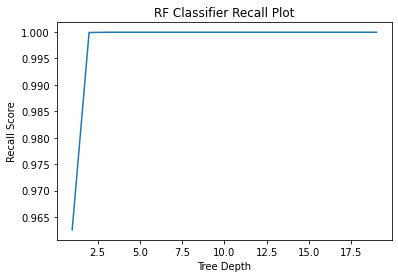

In [20]:
plt.plot(ilist, recall_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Recall Score')
plt.title('RF Classifier Recall Plot')
plt.show()

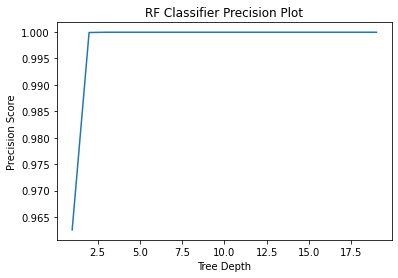

In [21]:
plt.plot(ilist, precision_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Precision Score')
plt.title('RF Classifier Precision Plot')
plt.show()

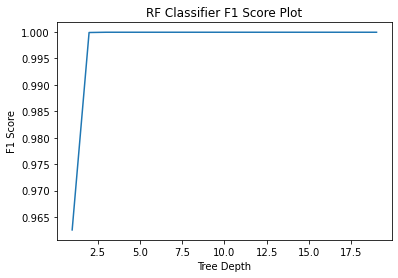

In [22]:
plt.plot(ilist, f1_scores)
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.title('RF Classifier F1 Score Plot')
plt.show()